In [2]:
pip install pandas matplotlib seaborn numpy

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/a8/44/d9502bf0ed197ba9bf1103c9867d5904ddcaf869e52329787fc54ed70cc8/pandas-2.2.3-cp311-cp311-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 170.0 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/a5/14/a1b840075be247bb1834b22c1e1d558740b0f618fe3a823740181ca557a1/matplotlib-3.10.1-cp311-cp311-macosx_10_12_x86_64.whl.metadata
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/e2/a7/b14f0a73eb0fe77cb9bd5b44534c183b23d4229c099e339c522724b02678/numpy-2.2.3-cp311-cp311-macosx_14_0_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB

   Block_No                                         Block_Hash  \
0    716599  0000000000000000000288bb2cdbd907a32fdff4b8d9db...   
1    716600  00000000000000000001fa03c2ad182a401c03c42f3e52...   
2    716601  000000000000000000020f5e0c167fa9d817a16cb6c334...   
3    716602  00000000000000000003e9f054f5c6f3f71e11b790fe1c...   
4    716603  000000000000000000072ba79db2b57c4efa08f11f1d8f...   

   Number_Transactions    Total_Input   Total_Output  Trans_Fees  \
0                  962   178665455775   178652772683    12683092   
1                 1466   526691003674   526674551924    16451750   
2                 1135   436590280968   436582699597     7581371   
3                  448  2305185274561  2305182722991     2551570   
4                  851  2518196615364  2518191618673     4996691   

       Difficulty  Block_Weight  Block_Reward       Nonce  \
0  24272331996980       3970548     625000000  1242426802   
1  24272331996980       3997974     625000000   576558708   
2  24272331

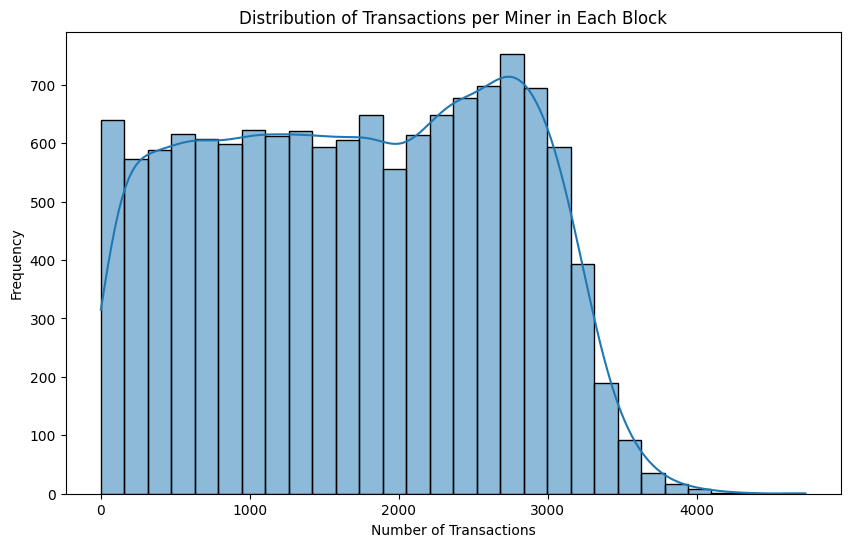

           DT        TM           timestamp
0  2022/01/01  00:04:14 2022-01-01 00:04:14
1  2022/01/01  00:14:14 2022-01-01 00:14:14
2  2022/01/01  00:20:25 2022-01-01 00:20:25
3  2022/01/01  00:23:25 2022-01-01 00:23:25
4  2022/01/01  00:28:47 2022-01-01 00:28:47
Average time between blocks: 584.7340001504099 seconds


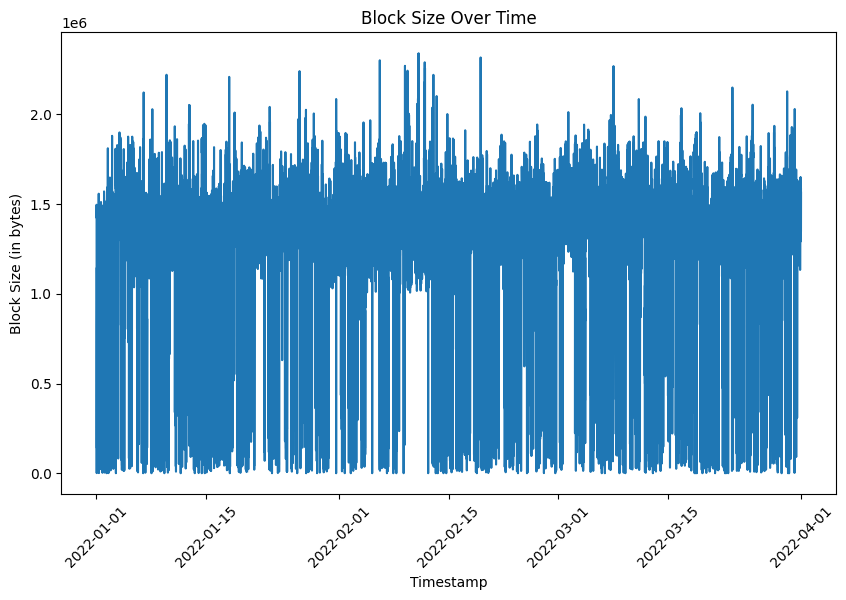

Block with highest transaction fee: 
Block_No                                                           724870
Block_Hash              0000000000000000000042ca50c2c4febcef70ab937e7e...
Number_Transactions                                                  1605
Total_Input                                                 3613200549617
Total_Output                                                3613100760269
Trans_Fees                                                       99789348
Difficulty                                                 27967152532434
Block_Weight                                                      3868234
Block_Reward                                                    625000000
Nonce                                                          2257360740
Prev_Block              000000000000000000091e080c5178d212f797e0942bff...
Merkle_Root             8ad5307d2960b629fa0eae8eef64d736b2148e939ab17b...
DT                                                             2022/02/25
T

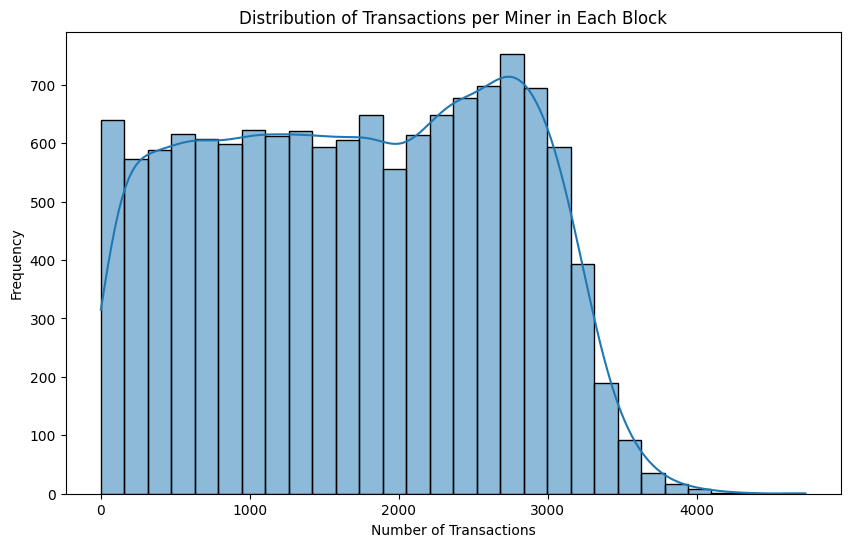

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

block_data = pd.read_csv('Block_Data.csv')
transaction_data = pd.read_csv('Transactions_2022_03_31.csv')

print(block_data.head())
print(transaction_data.head())
# Count transactions per miner
transactions_per_miner = block_data.groupby('Block_No')['Number_Transactions'].sum()

# Plot the distribution of transactions per miner
plt.figure(figsize=(10,6))
sns.histplot(transactions_per_miner, kde=True, bins=30)
plt.title('Distribution of Transactions per Miner in Each Block')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()
block_data['timestamp'] = pd.to_datetime(block_data['DT'].astype(str) + ' ' + block_data['TM'].astype(str))
print(block_data[['DT', 'TM', 'timestamp']].head())

block_data['time_diff'] = block_data['timestamp'].diff().dt.total_seconds()

# Calculate the average time between blocks
avg_time_between_blocks = block_data['time_diff'].mean()
print(f"Average time between blocks: {avg_time_between_blocks} seconds")
# Plot block size over time
plt.figure(figsize=(10,6))
sns.lineplot(data=block_data, x='timestamp', y='Block_Size')
plt.title('Block Size Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Block Size (in bytes)')
plt.xticks(rotation=45)
plt.show()
# Find the block with the highest transaction fee
max_fee_block = block_data.loc[block_data['Trans_Fees'].idxmax()]
print(f"Block with highest transaction fee: \n{max_fee_block}")

block_data['fee_per_weight'] = block_data['Trans_Fees'] / block_data['Block_Weight']

# Find the block with the highest fee per weight
max_fee_per_weight_block = block_data.loc[block_data['fee_per_weight'].idxmax()]
print(f"Block with highest fee per weight: \n{max_fee_per_weight_block}")
transaction_data['fee_per_transaction'] = transaction_data['Fees'] / transaction_data['Number_Input_Addr']

transaction_summary = transaction_data.groupby('Trans_No')['fee_per_transaction'].sum().reset_index()

print(transaction_summary.nlargest(10, 'fee_per_transaction'))
def load_data(file_path):
    """Load CSV data and return a pandas DataFrame."""
    try:
        return pd.read_csv(file_path)
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

def plot_transactions_per_miner(block_data):
    """Plot the distribution of transactions per miner."""
    transactions_per_miner = block_data.groupby('Block_No')['Number_Transactions'].sum()
    plt.figure(figsize=(10,6))
    sns.histplot(transactions_per_miner, kde=True, bins=30)
    plt.title('Distribution of Transactions per Miner in Each Block')
    plt.xlabel('Number of Transactions')
    plt.ylabel('Frequency')
    plt.show()

block_data = load_data('Block_Data.csv')
if block_data is not None:
    plot_transactions_per_miner(block_data)
